# Churn Modelling

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=1000)

# Importing the Dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Checking null Values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
x= df.iloc[:,3:-1]
print(type(x))
x

<class 'pandas.core.frame.DataFrame'>


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [5]:
y= df.iloc[:,-1].values
print(type(y))
y

<class 'numpy.ndarray'>


array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [6]:
df.iloc[:,-1].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# Encoding Categorical Data

In [7]:
# import libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

Geography and Gender are categoriacal values <br>
Geography -> Label Encoder or Ordinal Encoder <br>
Gender    -> One Hot Encoder <br>
We can directy use Column transformer apply One Hot Encoder and Ordinal Encoder or we apply One Hot Encoder  and Label Encoder separtately

In [8]:
ct = ColumnTransformer(transformers=[('Country',OneHotEncoder(),[1]),('Gender',OrdinalEncoder(),[2])],remainder='passthrough')
x= ct.fit_transform(x)

In [9]:
# Avoiding Dummy variable Trap
x=x[:,1:]

# Spliting the Dataset

Spliting the Datset into 2 sets only.  
We will split the data for validation in cross validation technique, but will create hold out set for testing the model.  
Both the sets will have equal proportion of class label

In [10]:
from sklearn.model_selection import train_test_split
X, x_hold_out ,Y, y_hold_out = train_test_split(x,y,test_size=0.1,random_state=42,stratify=y)
print(X.shape,x_hold_out.shape,Y.shape,y_hold_out.shape)

(9000, 11) (1000, 11) (9000,) (1000,)


In [11]:
print(f"Ratio in hold_out_set -> {Counter(y_hold_out)[1]/len(y_hold_out)}")
print(f"Ratio in for cross validate set -> {round(Counter(Y)[1]/len(Y),3)}")

Ratio in hold_out_set -> 0.204
Ratio in for cross validate set -> 0.204


# Feature Scaling

We will not performing scaling at this step becuase we have to scale and tranform Each Fold separately.  
If we perform scaling, we will be leaking the data for validation.

# Cross Validation

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

In [12]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
tf.__version__

'2.13.0'

## K-Fold Cross Validation

K-fold cross-validation is a technique for evaluating predictive models.  
 The data is divided into k subsets or folds. The model is trained and evaluated k times, using a different fold as the validation set each time.

In [13]:
from sklearn.model_selection import KFold
kcv=KFold(n_splits=9,shuffle=True,random_state=7)

## Stratified K-Fold Cross Validtion

Stratified K fold cross-validation object is a variation of KFold that returns stratified folds.  
The folds are made by preserving the percentage of samples for each class.

In [14]:
from sklearn.model_selection import StratifiedKFold
scv =  StratifiedKFold(n_splits=9,shuffle=True,random_state=7)

# Stratified K-Fold vs K-FOld CV

##  Class Distribution in Folds

In [15]:
ratio = lambda idx: Counter(Y[idx])[1]/len(Y[idx])
def fold_class_ratio(cv):
    for fold_no,(train,test) in enumerate(cv.split(X,Y)):
        print(f'{fold_no+1} Fold Ratio-> Training Set : {round(ratio(train),3)} Validatiion Set : {ratio(test)}')  

In [16]:
print("K-Fold")
fold_class_ratio(kcv)

K-Fold
1 Fold Ratio-> Training Set : 0.202 Validatiion Set : 0.214
2 Fold Ratio-> Training Set : 0.202 Validatiion Set : 0.219
3 Fold Ratio-> Training Set : 0.206 Validatiion Set : 0.188
4 Fold Ratio-> Training Set : 0.205 Validatiion Set : 0.189
5 Fold Ratio-> Training Set : 0.203 Validatiion Set : 0.213
6 Fold Ratio-> Training Set : 0.202 Validatiion Set : 0.215
7 Fold Ratio-> Training Set : 0.206 Validatiion Set : 0.187
8 Fold Ratio-> Training Set : 0.203 Validatiion Set : 0.211
9 Fold Ratio-> Training Set : 0.204 Validatiion Set : 0.197


In [17]:
print("Stratified K-Fold")
fold_class_ratio(scv)

Stratified K-Fold
1 Fold Ratio-> Training Set : 0.204 Validatiion Set : 0.203
2 Fold Ratio-> Training Set : 0.204 Validatiion Set : 0.203
3 Fold Ratio-> Training Set : 0.204 Validatiion Set : 0.203
4 Fold Ratio-> Training Set : 0.204 Validatiion Set : 0.204
5 Fold Ratio-> Training Set : 0.204 Validatiion Set : 0.204
6 Fold Ratio-> Training Set : 0.204 Validatiion Set : 0.204
7 Fold Ratio-> Training Set : 0.204 Validatiion Set : 0.204
8 Fold Ratio-> Training Set : 0.204 Validatiion Set : 0.204
9 Fold Ratio-> Training Set : 0.204 Validatiion Set : 0.204


Stratified K-Fold gives you stratified folds, which is useful when your Dataset have imbalanced Class Distribution

## Building the Model

In [18]:
def build_model():
    nn = tf.keras.Sequential()
    nn.add(tf.keras.layers.Input(shape=11))
    nn.add(tf.keras.layers.Dense(units=7,activation='relu',kernel_initializer='glorot_uniform'))
    nn.add(tf.keras.layers.Dropout(rate=0.1))
    nn.add(tf.keras.layers.Dense(units=5,activation='relu'))    
    nn.add(tf.keras.layers.Dropout(rate=0.1))
    nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
    nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return nn

In [19]:
def cross_validation_score(cv):
    scores_per_fold=[]
    for fold_no,(train,test) in enumerate(cv.split(X,Y)):
        print(f"Training for Fold {fold_no+1}")
        sc= StandardScaler()
        x_train , x_test = X[train] , X[test]
        x_train=sc.fit_transform(x_train)
        x_test=sc.transform(x_test)
        nn=build_model()
        nn.fit(x_train,Y[train],batch_size=20,epochs=50)
        scores = nn.evaluate(x_test,Y[test],)
        scores_per_fold.append(scores)
    return scores_per_fold

## Evaluation

### K-Fold

In [20]:
# implementing K-fold cross validation
kfold_scores = cross_validation_score(kcv)

Training for Fold 1


Epoch 1/50
400/400 [==============================] - 2s 2ms/step - loss: 0.5346 - accuracy: 0.7800
Epoch 2/50
400/400 [==============================] - 1s 3ms/step - loss: 0.4763 - accuracy: 0.7954
Epoch 3/50
400/400 [==============================] - 1s 3ms/step - loss: 0.4587 - accuracy: 0.7961
Epoch 4/50
400/400 [==============================] - 1s 3ms/step - loss: 0.4458 - accuracy: 0.7980
Epoch 5/50
400/400 [==============================] - 2s 4ms/step - loss: 0.4342 - accuracy: 0.8035
Epoch 6/50
400/400 [==============================] - 2s 5ms/step - loss: 0.4275 - accuracy: 0.8079
Epoch 7/50
400/400 [==============================] - 2s 4ms/step - loss: 0.4184 - accuracy: 0.8129
Epoch 8/50
400/400 [==============================] - 1s 4ms/step - loss: 0.4165 - accuracy: 0.8180
Epoch 9/50
400/400 [==============================] - 1s 3ms/step - loss: 0.4102 - accuracy: 0.8179
Epoch 10/50
400/400 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8292

#### Loss per Fold

In [21]:
kfold_loss =[loss[0] for loss in kfold_scores]
print(kfold_loss)

[0.3619118928909302, 0.3901122510433197, 0.3560061752796173, 0.3569622337818146, 0.3444518446922302, 0.3619302809238434, 0.35552504658699036, 0.36086374521255493, 0.32741618156433105]


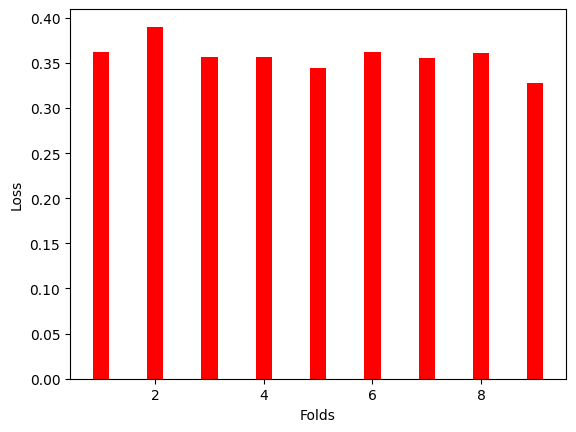

In [22]:
folds = list(range(1,10))
plt.bar(folds,kfold_loss,width=0.3,color="red")
plt.xlabel("Folds")
plt.ylabel("Loss")
plt.show()

#### Accuarcy per Fold

In [23]:
kfold_acc = [ acc[1]*100 for acc in kfold_scores]
print(kfold_acc)

[84.7000002861023, 85.00000238418579, 85.6000006198883, 87.00000047683716, 85.79999804496765, 85.39999723434448, 86.19999885559082, 85.29999852180481, 87.00000047683716]


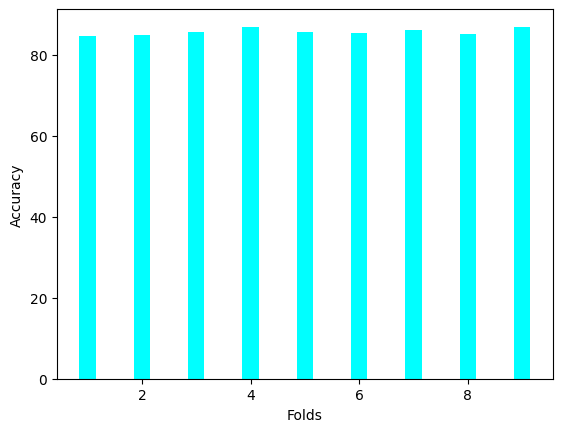

In [24]:
plt.bar(folds,kfold_acc,width=0.3,color="cyan")
plt.xlabel("Folds")
plt.ylabel("Accuracy")
plt.show()

In [25]:
print(f"Mean -> {np.array(kfold_acc).mean()}")

Mean -> 85.77777743339539


### Stratified K-Fold

In [26]:
# Implementing Stratified K-Fold
skcv_scores = cross_validation_score(scv)

Training for Fold 1
Epoch 1/50
400/400 [==============================] - 2s 2ms/step - loss: 0.5449 - accuracy: 0.7854
Epoch 2/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4718 - accuracy: 0.7960
Epoch 3/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4489 - accuracy: 0.8040
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4374 - accuracy: 0.8071
Epoch 5/50
400/400 [==============================] - 1s 1ms/step - loss: 0.4284 - accuracy: 0.8156
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4267 - accuracy: 0.8169
Epoch 7/50
400/400 [==============================] - 1s 1ms/step - loss: 0.4204 - accuracy: 0.8175
Epoch 8/50
400/400 [==============================] - 1s 1ms/step - loss: 0.4154 - accuracy: 0.8188
Epoch 9/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4192 - accuracy: 0.8183
Epoch 10/50
400/400 [==============================] - 1s 1ms/step - loss: 0.416

#### Loss per Fold

In [27]:
skcv_loss = [loss[0] for loss in skcv_scores]
print(skcv_loss)

[0.3659074306488037, 0.3609316647052765, 0.324645459651947, 0.3520343005657196, 0.36442887783050537, 0.3235675096511841, 0.3365887701511383, 0.34529146552085876, 0.36815345287323]


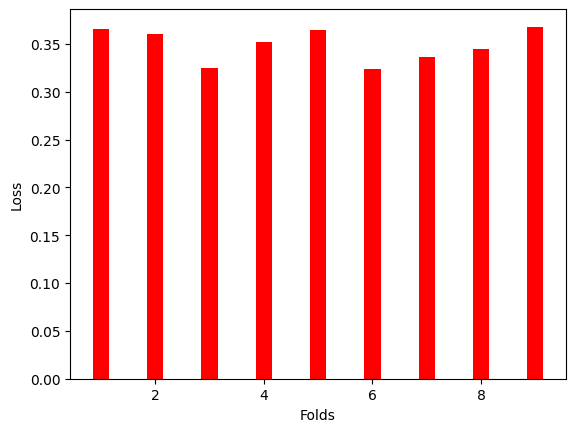

In [28]:
plt.bar(folds,skcv_loss,width=0.3,color="red")
plt.xlabel("Folds")
plt.ylabel("Loss")
plt.show()

#### Accuarcy per Fold

In [29]:

skcv_acc = [acc[1]*100 for acc in skcv_scores]
print(skcv_acc)

[85.19999980926514, 84.7000002861023, 86.90000176429749, 85.10000109672546, 85.69999933242798, 87.90000081062317, 86.00000143051147, 86.40000224113464, 84.89999771118164]


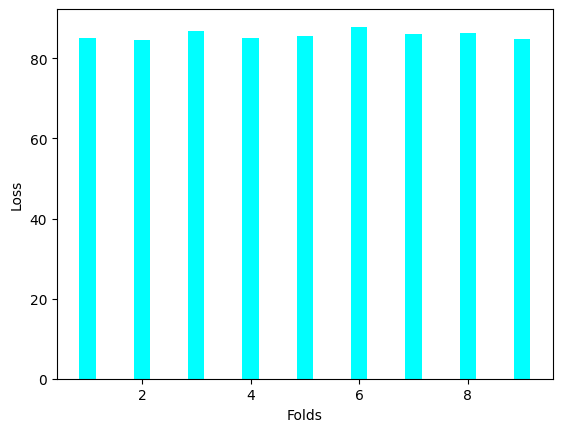

In [30]:
plt.bar(folds,skcv_acc,width=0.3,color="cyan")
plt.xlabel("Folds")
plt.ylabel("Loss")
plt.show()

In [31]:
print(f"Mean - {np.array(skcv_acc).mean()}")
    

Mean - 85.8666671646966


# wrappers.KerasClassifier and cross_val_score

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

We can not use Keras model directly in sklearn cross_val_score,  
we will need wrapper, to use keras model in cross_val_score

In [33]:
from scikeras.wrappers import KerasClassifier

In [34]:
classifier= KerasClassifier(build_fn=build_model,batch_size=20,epochs=50)

In [35]:
pipe=Pipeline([('scaler',StandardScaler()),('model',classifier)],verbose=True)

In [36]:
cvs = cross_val_score(estimator=pipe,X=X,y=Y,cv=9,n_jobs=-1,verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.0min finished


In [37]:
print(cvs)
cvs.mean()*100

[0.848 0.835 0.86  0.864 0.853 0.843 0.861 0.863 0.875]


85.57777777777777